# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

# Conversion Rate Analysis Based on Income, Spending, and Age

## Download file 'Dataset'


In [ ]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [ ]:
# Load the dataset
df = pd.read_csv('marketing_campaign_data.csv')
data = df.copy()
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

Unnamed: 0             False
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

## Melakukan feature engineering: conversion rate dengan definisi (#response / #visit)
Tidak hanya conversion rate, namun juga cari feature lain yang representatif, contohnya seperti umur, jumlah anak, total pengeluaran, total transaksi, dll.

In [ ]:
# Define the conversion rate feature engineering
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth'] * 100
df.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0.000000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0.000000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0.000000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0.000000
2239,2239,9405,1954,S3,Menikah,52869000.0,1,1,15-10-2012,40,84000,3000,61000,2000,1000,21000,3,3,1,4,7,0,0,0,0,0,0,3,11,1,14.285714


In [ ]:
df['total_response'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['total_response'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: total_response, dtype: int64

In [ ]:
# Define the conversion rate feature engineering
df['conversion_rate2'] = df['total_response'] / df['NumWebVisitsMonth'] * 100
df.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,total_response,conversion_rate2
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0.000000,0,0.000000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0.000000,1,14.285714
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0.000000,1,16.666667
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0.000000,0,0.000000
2239,2239,9405,1954,S3,Menikah,52869000.0,1,1,15-10-2012,40,84000,3000,61000,2000,1000,21000,3,3,1,4,7,0,0,0,0,0,0,3,11,1,14.285714,1,14.285714


#### **FEATURE ENGINEERING: JUMLAH ANAK**

In [ ]:
df['kids_count'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['kids_count'].describe()

count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: kids_count, dtype: float64

#### **FEATURE ENGINEERING: TOTAL PENGELUARAN**

In [ ]:
df['expenses_count'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# Set the float format to display full numbers without scientific notation
pd.options.display.float_format = '{:.7f}'.format  # Adjust the number of decimal places as needed

df['expenses_count'].describe()

count      2240.0000000
mean     605798.2142857
std      602249.2880110
min        5000.0000000
25%       68750.0000000
50%      396000.0000000
75%     1045500.0000000
max     2525000.0000000
Name: expenses_count, dtype: float64

#### **FEATURE ENGINEERING: TOTAL TRANSAKSI**

In [ ]:
df['total_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
df['total_purchases'].describe()

count   2240.0000000
mean      14.8620536
std        7.6771726
min        0.0000000
25%        8.0000000
50%       15.0000000
75%       21.0000000
max       44.0000000
Name: total_purchases, dtype: float64

In [ ]:
# Define the total purchases groups
bins = [0, 8, 21, 44]
labels = ['low', 'mid', 'high']

# Create a new column 'age_group'
df['total_purchases_group'] = pd.cut(df['total_purchases'], bins=bins, labels=labels)

#### **FEATURE ENGINEERING: TOTAL RESPONS**

In [ ]:
df['total_response'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: total_response, dtype: int64

#### **FEATURE ENGINEERING: MARITAL STATUS**

In [ ]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

In [ ]:
def group_marital_status(status):
    if status in ['Menikah', 'Bertunangan']:
        return 'relationship'
    elif status in ['Lajang', 'Cerai', 'Janda', 'Duda']:
        return 'single'
    else:
        return status  # Menjaga nilai asli jika tidak ada yang sesuai

df['marital_status_group'] = df['Marital_Status'].apply(group_marital_status)


In [ ]:
df['marital_status_group'].value_counts()

relationship    1444
single           796
Name: marital_status_group, dtype: int64

#### **FEATURE ENGINEERING: EDUCATION**

In [ ]:
df['Education'].value_counts()

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

In [ ]:
def education_group(x):
    if x in ['S1','S2','S3']:
        return 'advance'
    elif x in ['D3','SMA']:
        return 'basic'
    else:
        return x  # Menjaga nilai asli jika tidak ada yang sesuai

df['education_group'] = df['Education'].apply(education_group)


## Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok

In [ ]:
import datetime

# counting age
#current_year = datetime.datetime.now().year
current_year = 2014
df['age'] = current_year - df['Year_Birth']
df.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,total_response,conversion_rate2,kids_count,expenses_count,total_purchases,total_purchases_group,marital_status_group,education_group,age
2235,2235,10870,1967,S1,Menikah,61223000.0000000,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0.0000000,0,0.0000000,1,1341000,18,mid,relationship,advance,47
2236,2236,4001,1946,S3,Bertunangan,64014000.0000000,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,0.0000000,1,14.2857143,3,444000,22,high,relationship,advance,68
2237,2237,7270,1981,S1,Cerai,56981000.0000000,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0.0000000,1,16.6666667,0,1241000,19,mid,single,advance,33
2238,2238,8235,1956,S2,Bertunangan,69245000.0000000,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0.0000000,0,0.0000000,1,843000,23,high,relationship,advance,58
2239,2239,9405,1954,S3,Menikah,52869000.0000000,1,1,15-10-2012,40,84000,3000,61000,2000,1000,21000,3,3,1,4,7,0,0,0,0,0,0,3,11,1,14.2857143,1,14.2857143,2,172000,11,mid,relationship,advance,60


In [ ]:
df['age'].describe()

count   2240.0000000
mean      45.1941964
std       11.9840695
min       18.0000000
25%       37.0000000
50%       44.0000000
75%       55.0000000
max      121.0000000
Name: age, dtype: float64

In [ ]:
# Define the age groups
bins = [18, 37, 55, 121]
labels = ['Young', 'Middle', 'Elderly']

# Create a new column 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [ ]:
df['age_group'].describe()

count       2238
unique         3
top       Middle
freq        1115
Name: age_group, dtype: object

In [ ]:
cat_freq = df['age_group'].value_counts()
print("Jumlah muncul setiap kategori dalam kolom 'age_group':")
print(cat_freq)

Jumlah muncul setiap kategori dalam kolom 'age_group':
Middle     1115
Young       604
Elderly     519
Name: age_group, dtype: int64


## Membuat plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign


In [ ]:
df.isnull().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
conversion_rate          11
total_response            0
conversion_rate2         10
kids_count                0
expenses_count            0
total_purchases     

In [ ]:
df['total_purchases_group'].describe()

count     2236
unique       3
top        mid
freq      1078
Name: total_purchases_group, dtype: object

In [ ]:
df['conversion_rate'] = df['conversion_rate'].fillna(df['conversion_rate'].mean())
df['conversion_rate2'] = df['conversion_rate2'].fillna(df['conversion_rate2'].mean())
df['age_group'] = df['age_group'].fillna('Young') #age_group diisi dengan cat frequency terbanyak
df['total_purchases_group'] = df['total_purchases_group'].fillna('mid')

df.isna().any()

Unnamed: 0               False
ID                       False
Year_Birth               False
Education                False
Marital_Status           False
Income                   False
Kidhome                  False
Teenhome                 False
Dt_Customer              False
Recency                  False
MntCoke                  False
MntFruits                False
MntMeatProducts          False
MntFishProducts          False
MntSweetProducts         False
MntGoldProds             False
NumDealsPurchases        False
NumWebPurchases          False
NumCatalogPurchases      False
NumStorePurchases        False
NumWebVisitsMonth        False
AcceptedCmp3             False
AcceptedCmp4             False
AcceptedCmp5             False
AcceptedCmp1             False
AcceptedCmp2             False
Complain                 False
Z_CostContact            False
Z_Revenue                False
Response                 False
conversion_rate          False
total_response           False
conversi

In [ ]:
# handle data type
df[['conversion_rate','total_response','conversion_rate2','age','age_group','kids_count','expenses_count','total_purchases','marital_status_group']].dtypes

conversion_rate          float64
total_response             int64
conversion_rate2         float64
age                        int64
age_group               category
kids_count                 int64
expenses_count             int64
total_purchases            int64
marital_status_group      object
dtype: object

In [ ]:
df['conversion_rate2'].describe()

count   2240.0000000
mean             inf
std              NaN
min        0.0000000
25%        0.0000000
50%        0.0000000
75%       12.5000000
max              inf
Name: conversion_rate2, dtype: float64

In [ ]:
# Menghapus nilai "inf" dari DataFrame
df = df.replace([np.inf, -np.inf], np.nan)

# Menghapus baris yang berisi NaN (opsional)
df1 = df.dropna()

In [ ]:
# check data
print('before drop inf:', df.shape[0])
print('after drop inf:', df1.shape[0])

before drop inf: 2240
after drop inf: 2229


In [ ]:
# mengubah tipe data kolom
df1['conversion_rate'] = df1['conversion_rate'].astype(int)
df1['conversion_rate2'] = df1['conversion_rate2'].astype(int)
df1[['conversion_rate2','conversion_rate']].describe()

,conversion_rate2,conversion_rate
count,2229.0000000,2229.0000000
mean,14.9353970,4.3292956
std,42.8578539,14.2643404
min,0.0000000,0.0000000
25%,0.0000000,0.0000000
50%,0.0000000,0.0000000
75%,12.0000000,0.0000000
max,500.0000000,100.0000000


#### Grafik Age Group

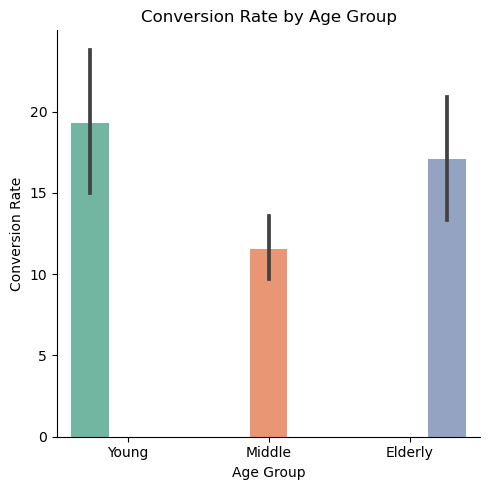

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='age_group', y='conversion_rate2', kind='bar', hue='age_group', palette='Set2')
plot.set(title='Conversion Rate by Age Group', xlabel='Age Group', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot age group', dpi=200)

**Interpretasi:** grafik di atas menunjukkan bahwa kategori usia berpengaruh terhadap conversion rate

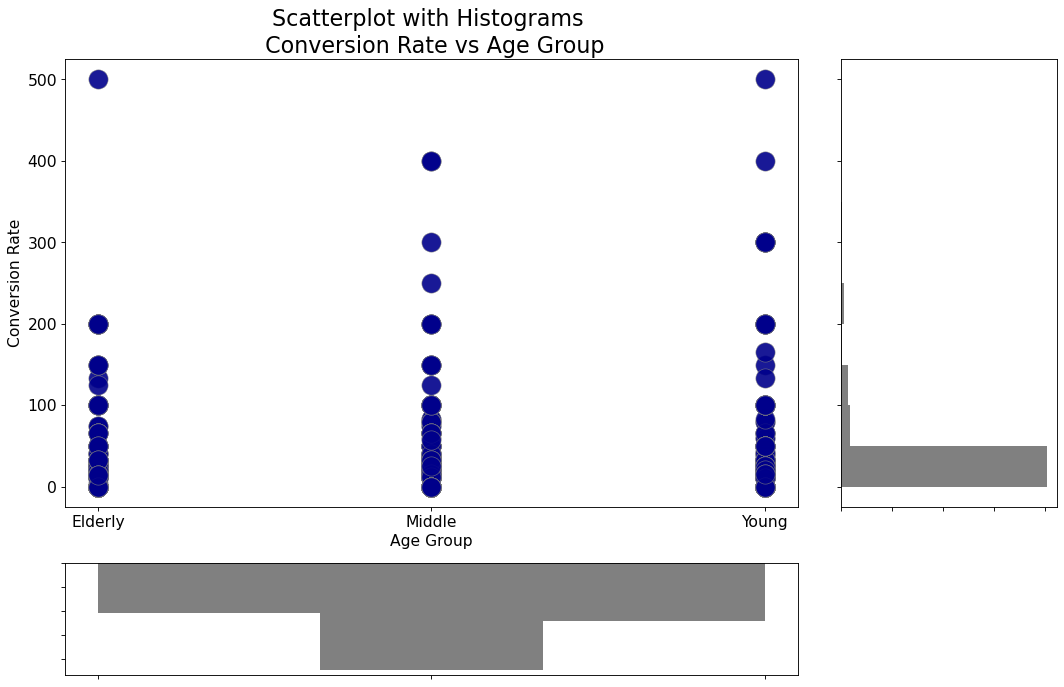

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('age_group', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['age_group'], bins=len(df1['age_group'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['conversion_rate2'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs Age Group', xlabel='Age Group', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot age group', dpi=200)

**Interpretasi:**
grafik di atas menunjukkan urutan conversion rate tertinggi hingga terendah berdasarkan kategori usia.
Usia yang memiliki conversion rate tertinggi adalah young, disusul dengan eldery dan yang terakhir middle.

#### Grafik Total Response

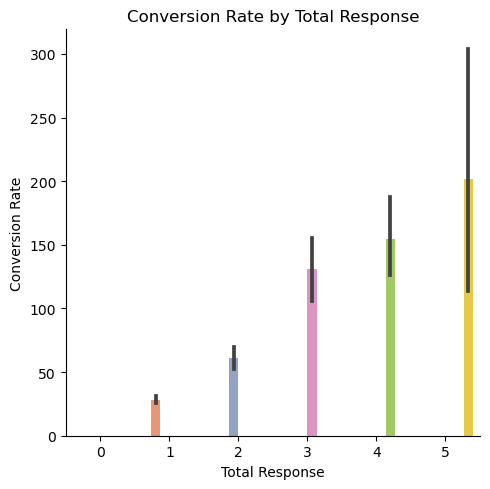

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='total_response', y='conversion_rate2', kind='bar', hue='total_response', palette='Set2')
plot.set(title='Conversion Rate by Total Response', xlabel='Total Response', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot total response', dpi=200)

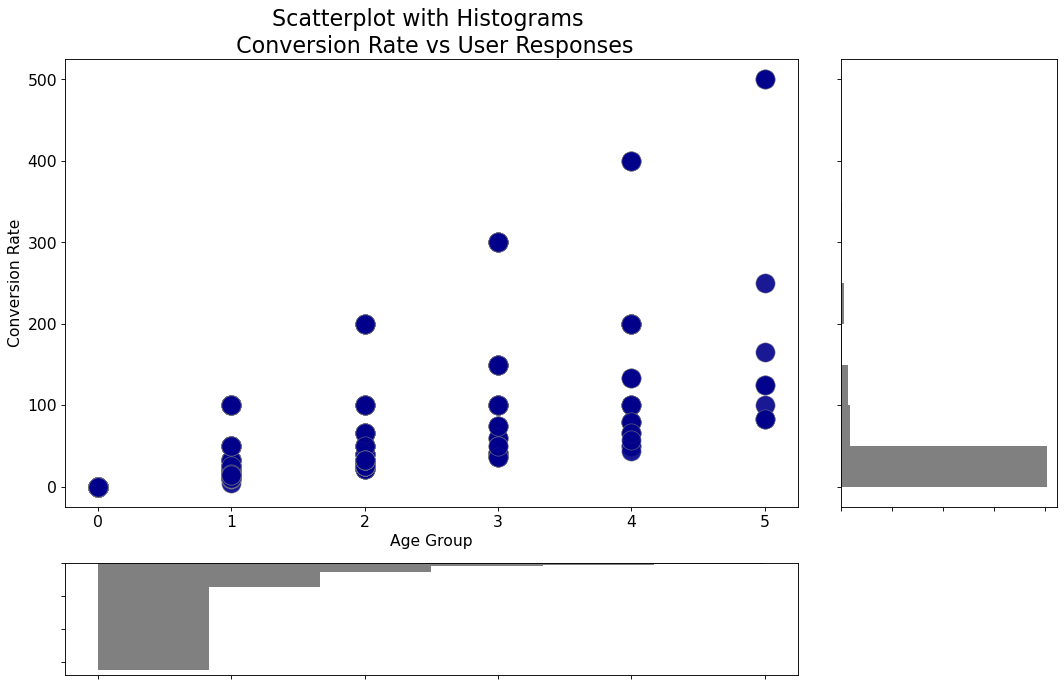

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('total_response', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['total_response'], bins=len(df1['total_response'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['conversion_rate2'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs User Responses', xlabel='Age Group', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot total response', dpi=200)

**Interpretasi:** grafik di atas menunjukkan bahwa semakin tinggi jumlah respon maka semakin tinggi pula conversion rate pada user tersebut.

#### Grafik Total Purchases Group

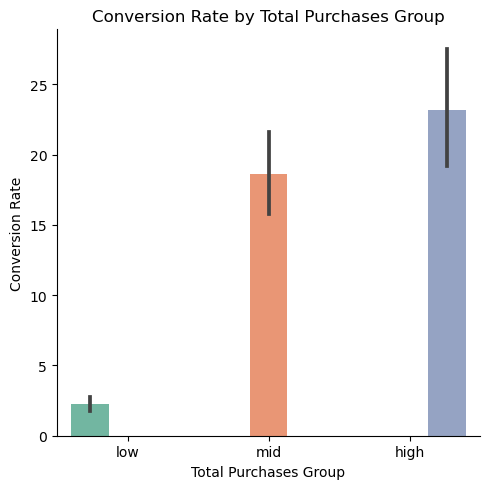

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='total_purchases_group', y='conversion_rate2', kind='bar', hue='total_purchases_group', palette='Set2')
plot.set(title='Conversion Rate by Total Purchases Group', xlabel='Total Purchases Group', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot total purchases group', dpi=200)

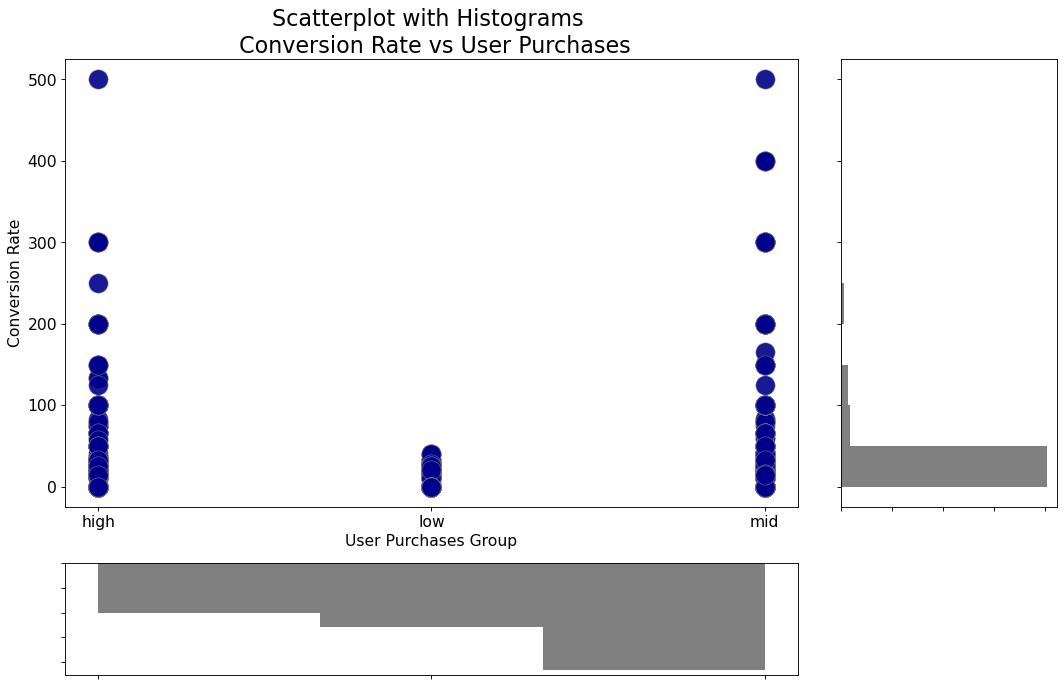

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('total_purchases_group', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['total_purchases_group'], bins=len(df1['total_purchases_group'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['conversion_rate2'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs User Purchases', xlabel='User Purchases Group', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot total purchases group', dpi=200)

**Interpretasi:** User kategori total purchases mid dan high memiliki conversion rate yang lebih tinggi dari pada user pada kategori total purchases low

#### Grafik Total Kids

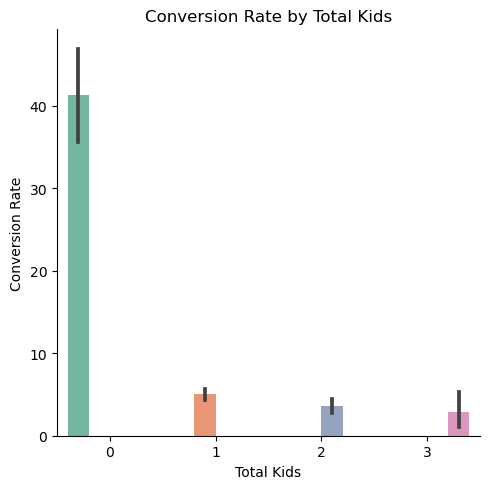

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='kids_count', y='conversion_rate2', kind='bar', hue='kids_count', palette='Set2')
plot.set(title='Conversion Rate by Total Kids', xlabel='Total Kids', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot total kids', dpi=200)

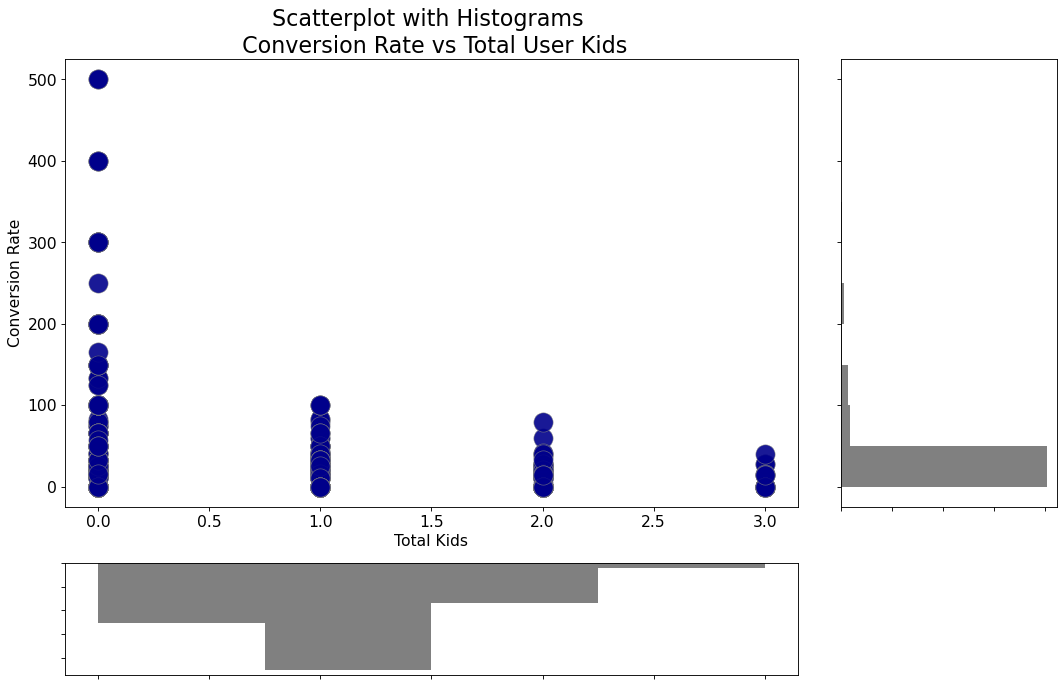

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('kids_count', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['kids_count'], bins=len(df1['kids_count'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['conversion_rate2'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs Total User Kids', xlabel='Total Kids', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot total kids', dpi=200)

**Interpretasi:** Semakin banyak anak yang dimiliki user maka semakin rendah conversion rate pada user tersebut

#### Grafik Marital Status

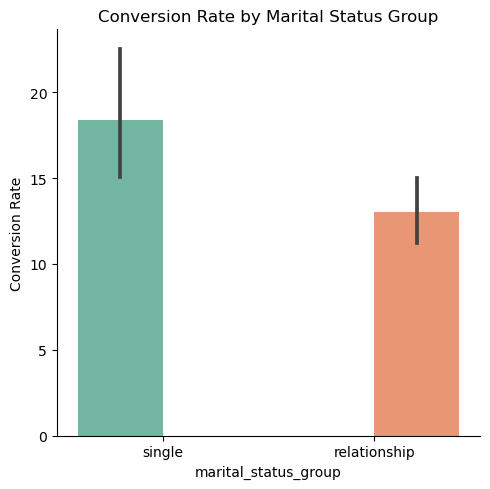

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='marital_status_group', y='conversion_rate2', kind='bar', hue='marital_status_group', palette='Set2')
plot.set(title='Conversion Rate by Marital Status Group', xlabel='marital_status_group', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot marital status', dpi=200)

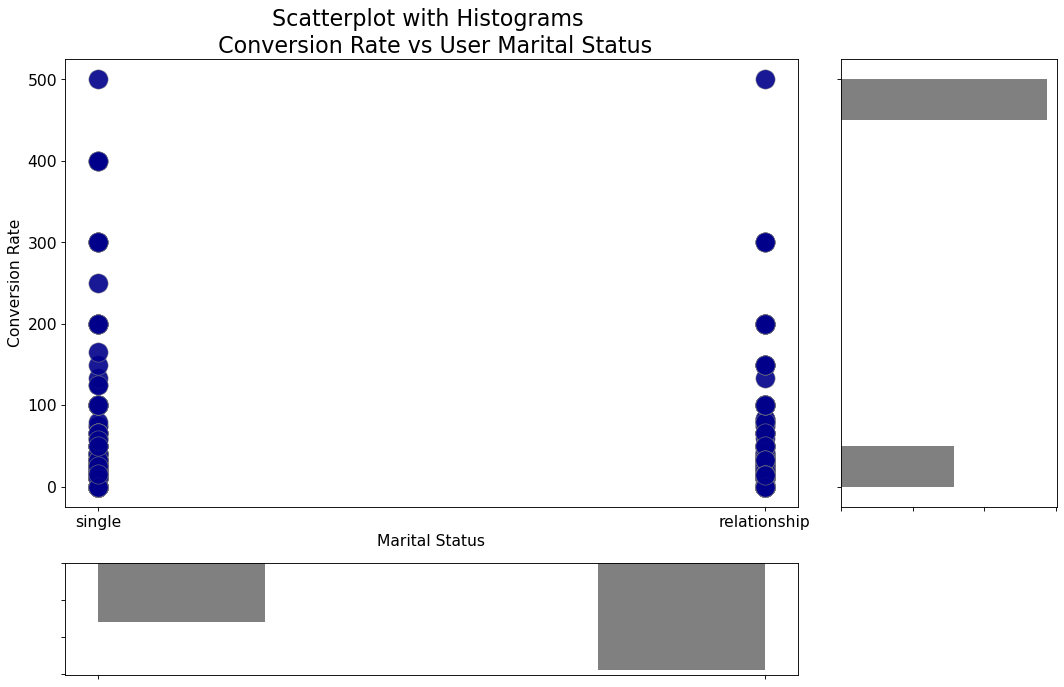

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('marital_status_group', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['marital_status_group'], bins=len(df1['kids_count'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['marital_status_group'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs User Marital Status', xlabel='Marital Status', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot marital status', dpi=200)

**Interpretasi:** User yang single memiliki conversion rate lebih tinggi dari pada user kategori relationship.

#### Grafik Total Expenses

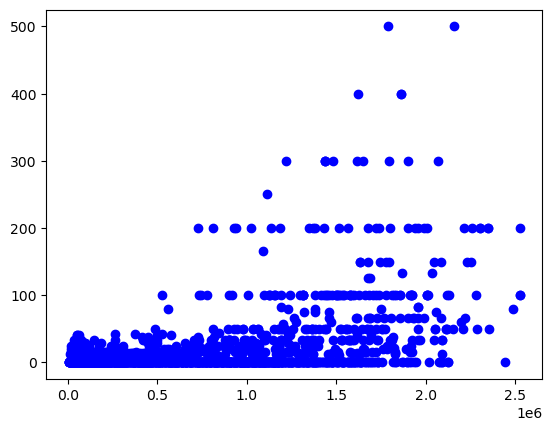

In [ ]:
plt.scatter(df1['expenses_count'], df1['conversion_rate2'], label='Data Points', color='blue', marker='o')

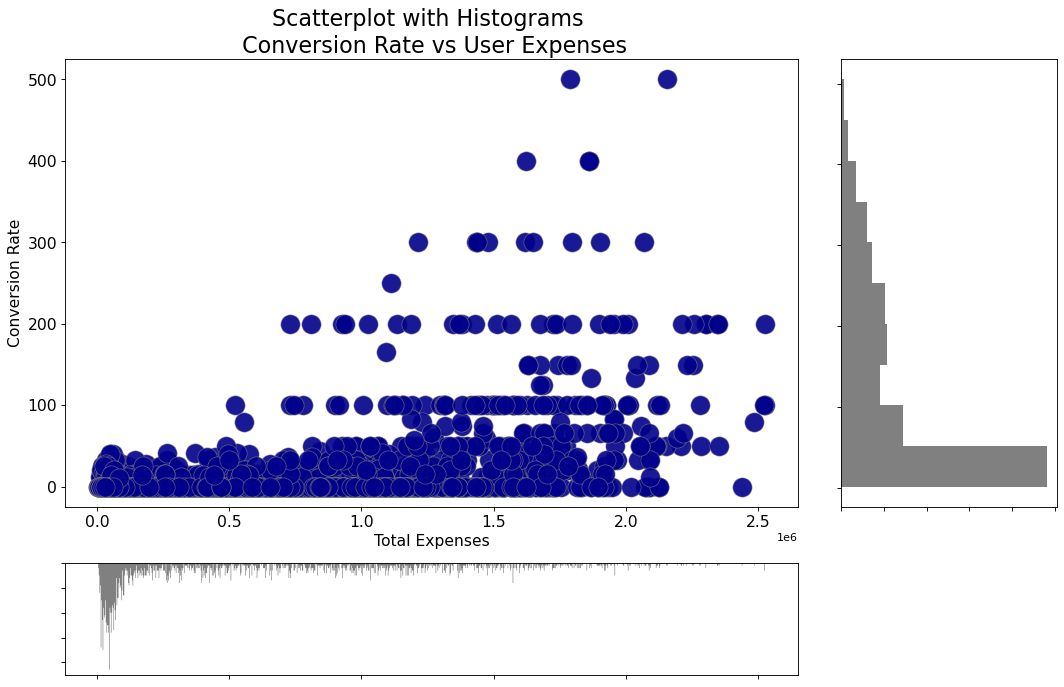

In [ ]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('expenses_count', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['expenses_count'], bins=len(df1['expenses_count'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['expenses_count'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs User Expenses', xlabel='Total Expenses', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot total expenses', dpi=200)

**Interpretasi:** Total expenses lebih tinggi menunjukkan conversion rate cenderung lebih tinggi.

#### Grafik Education Group

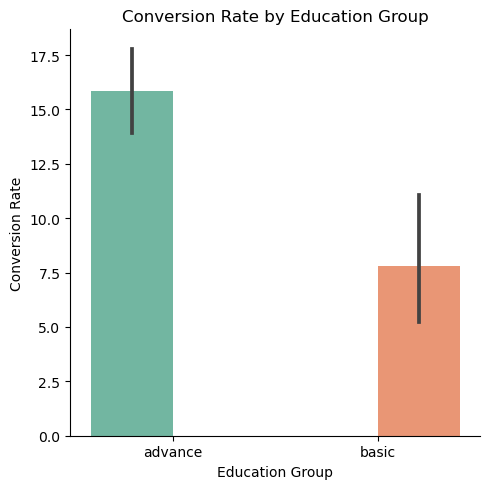

In [ ]:
# Membuat catplot
plot = sns.catplot(data=df1, x='education_group', y='conversion_rate2', kind='bar', hue='education_group', palette='Set2')
plot.set(title='Conversion Rate by Education Group', xlabel='Education Group', ylabel='Conversion Rate')

# Menampilkan plot
plt.tight_layout()
plt.savefig('catplot education group', dpi=200)

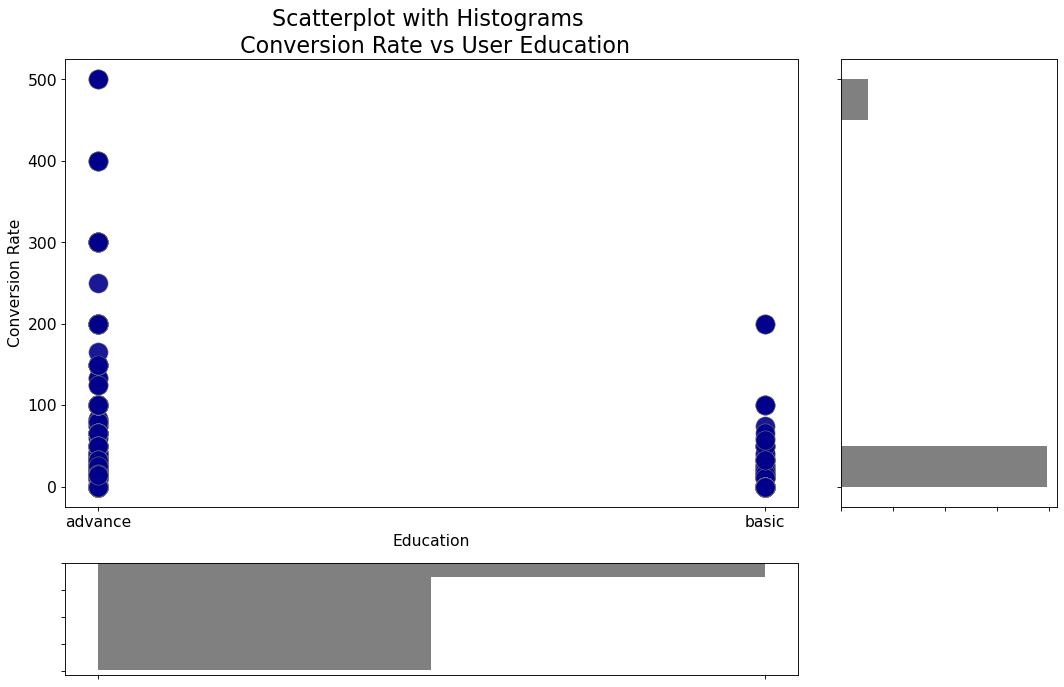

In [ ]:

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('education_group', 'conversion_rate2', s=300, c='darkblue', data=df1, alpha=.9, edgecolors='gray', linewidths=.5)

# Histogram on the right
ax_bottom.hist(df1['education_group'], bins=len(df1['education_group'].unique()), histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()

# Histogram on the bottom
ax_right.hist(df1['education_group'], bins=10, histtype='stepfilled', orientation='horizontal', color='grey')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n Conversion Rate vs User Education', xlabel='Education', ylabel='Conversion Rate')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.tight_layout()
plt.savefig('scatterplot education group', dpi=200)

**Interpretasi:** User kategori education advance memiliki conversion rate lebih tinggi dari pada user dengan kategori education basic.

## Interpretasi

terdapat hubungan yang signifikan antara umur custmer dan conversion rate, dimana urutan kategori usia yang memiliki conversion rate tinggi adalah young, elderly, dan middle.

# Data Cleaning & Preprocessing

## Mengatasi data null dan duplicated


In [ ]:
df1.isnull().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
conversion_rate          0
total_response           0
conversion_rate2         0
kids_count               0
expenses_count           0
total_purchases          0
total_purchases_group    0
m

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.duplicated(subset=['Z_CostContact', 'Z_Revenue']).sum()

2228

In [ ]:
df1.shape

(2229, 41)

## Membuang data yang tidak diperlukan


In [ ]:
kolom_yang_tidak_diperlukan = ['Unnamed: 0','Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Education','Marital_Status','Kidhome','Teenhome','MntCoke','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Z_CostContact','Z_Revenue','conversion_rate']
df2 = df1.drop(kolom_yang_tidak_diperlukan, axis=1)

In [ ]:
df2.nunique()

ID                       2229
Year_Birth                 59
Income                   1965
Recency                   100
NumDealsPurchases          15
NumWebPurchases            14
NumCatalogPurchases        13
NumStorePurchases          14
NumWebVisitsMonth          15
Complain                    2
total_response              6
conversion_rate2           33
kids_count                  4
expenses_count           1047
total_purchases            37
total_purchases_group       3
marital_status_group        2
education_group             2
age                        59
age_group                   3
dtype: int64

## Membershikan outlier pada data


In [ ]:
# Pisahkan kolom numerik dan kategorikal
nums = df2.select_dtypes(include=['number']).columns.tolist()
cats = df2.select_dtypes(exclude=['number']).columns.tolist()

print("Kolom Numerik:", nums)
print("Kolom Kategorikal:", cats)

Kolom Numerik: ['ID', 'Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'total_response', 'conversion_rate2', 'kids_count', 'expenses_count', 'total_purchases', 'age']
Kolom Kategorikal: ['total_purchases_group', 'marital_status_group', 'education_group', 'age_group']


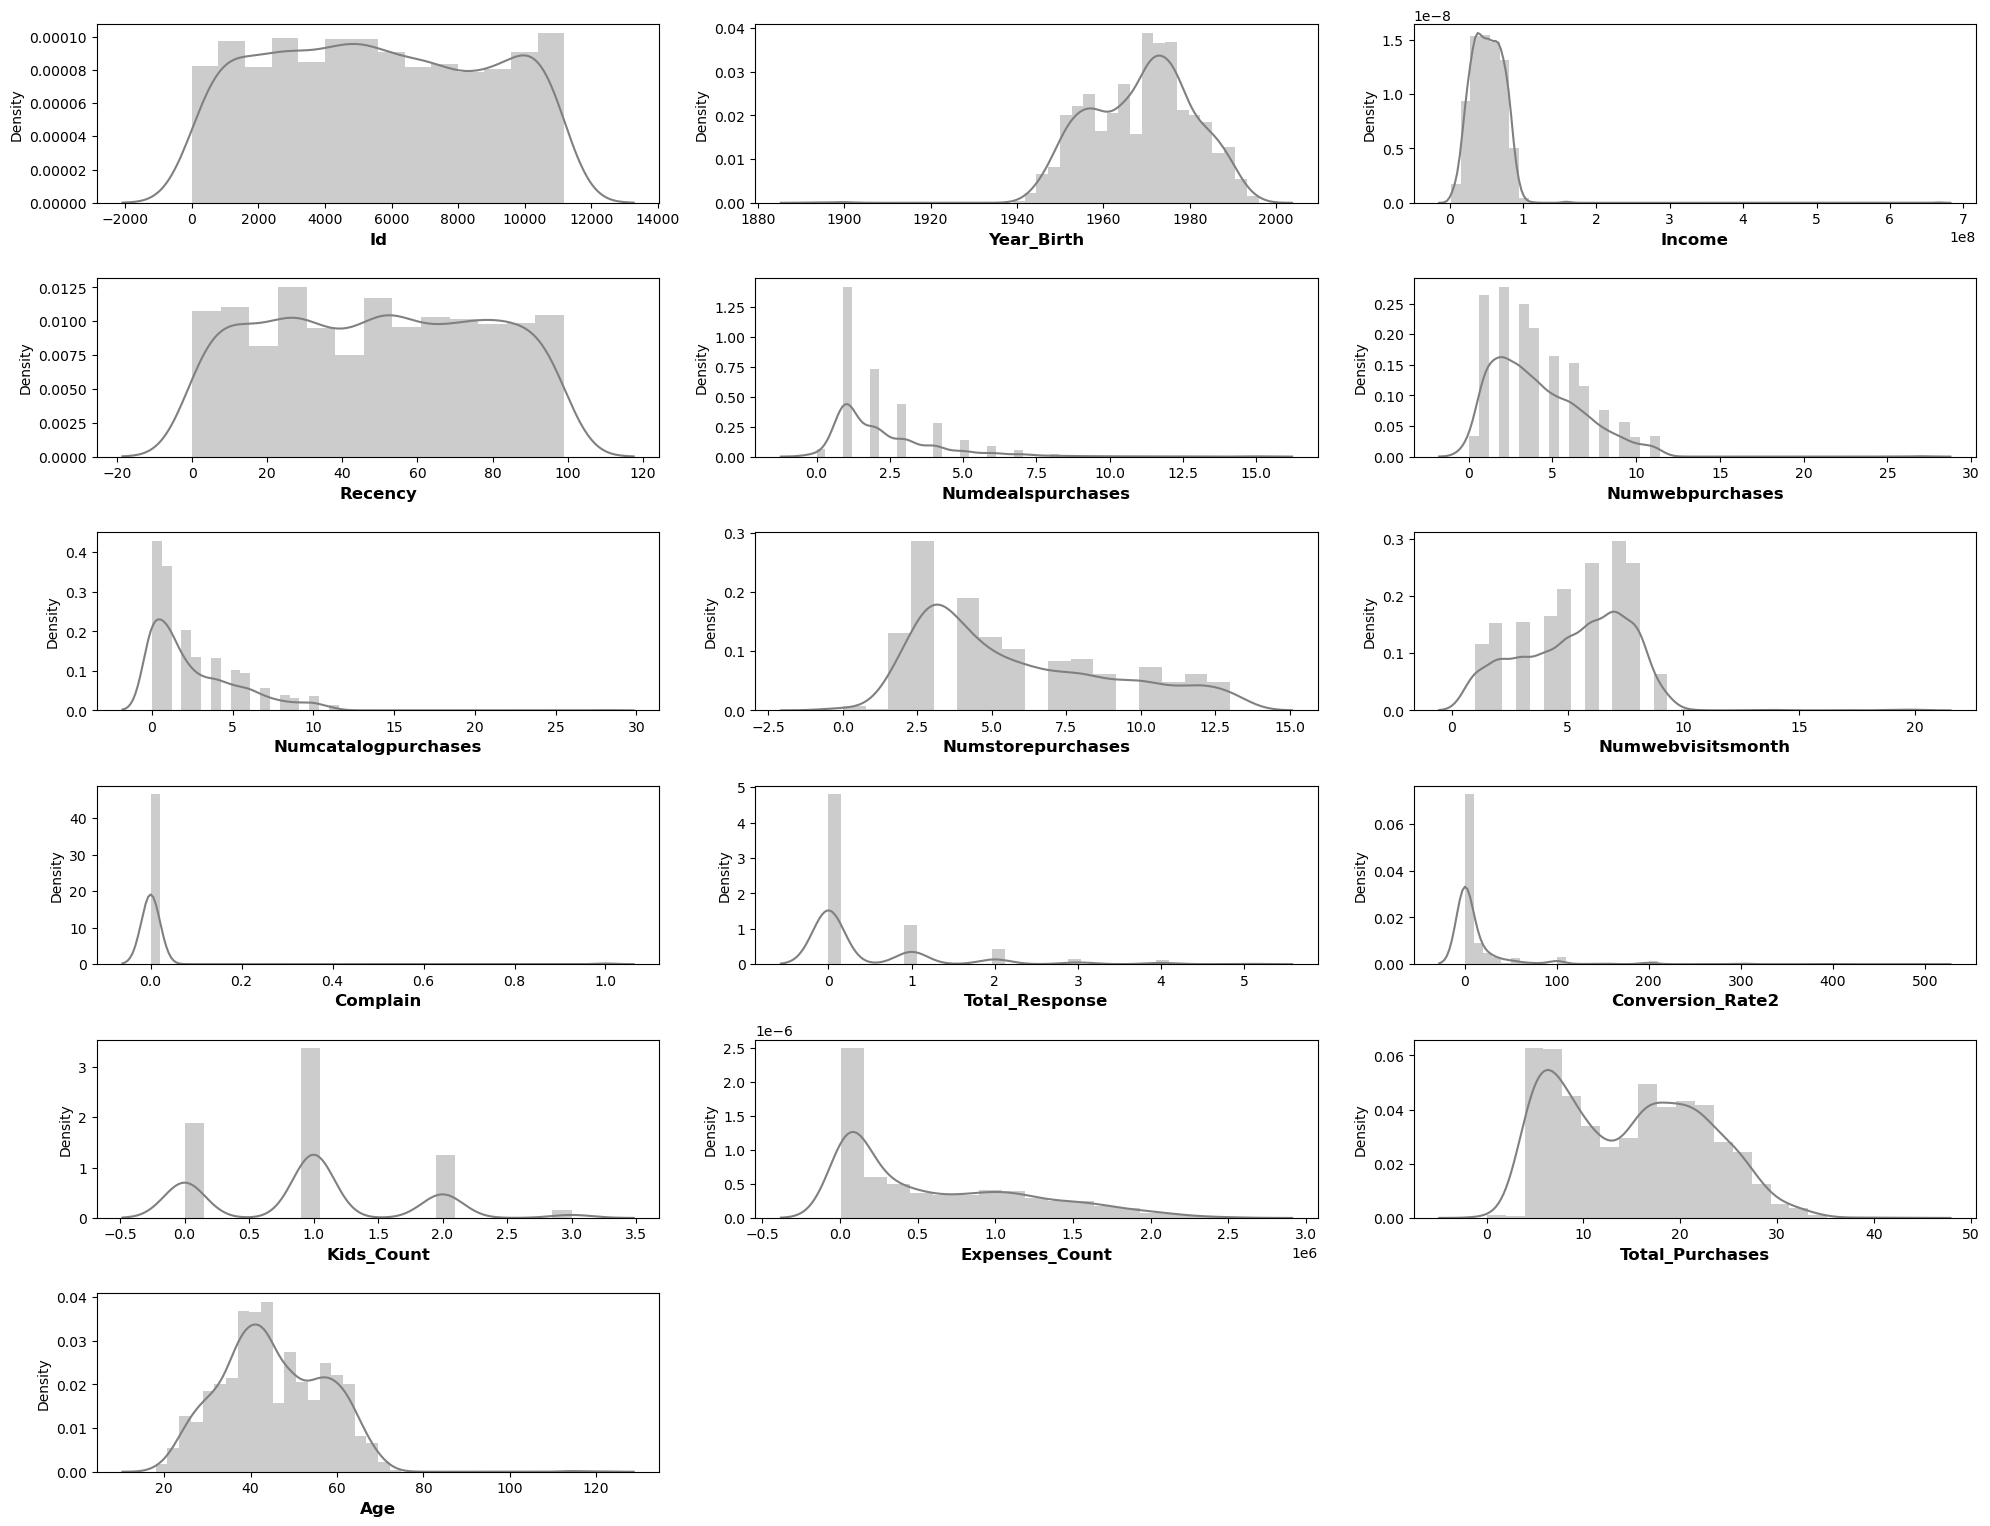

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(len(nums)):
    plt.subplot(8, 3, i+1)
    sns.distplot(df2[nums[i]], color='gray', kde=True)
    plt.xlabel(nums[i].title(), fontsize=12, weight='bold')
    plt.tight_layout()

plt.show()

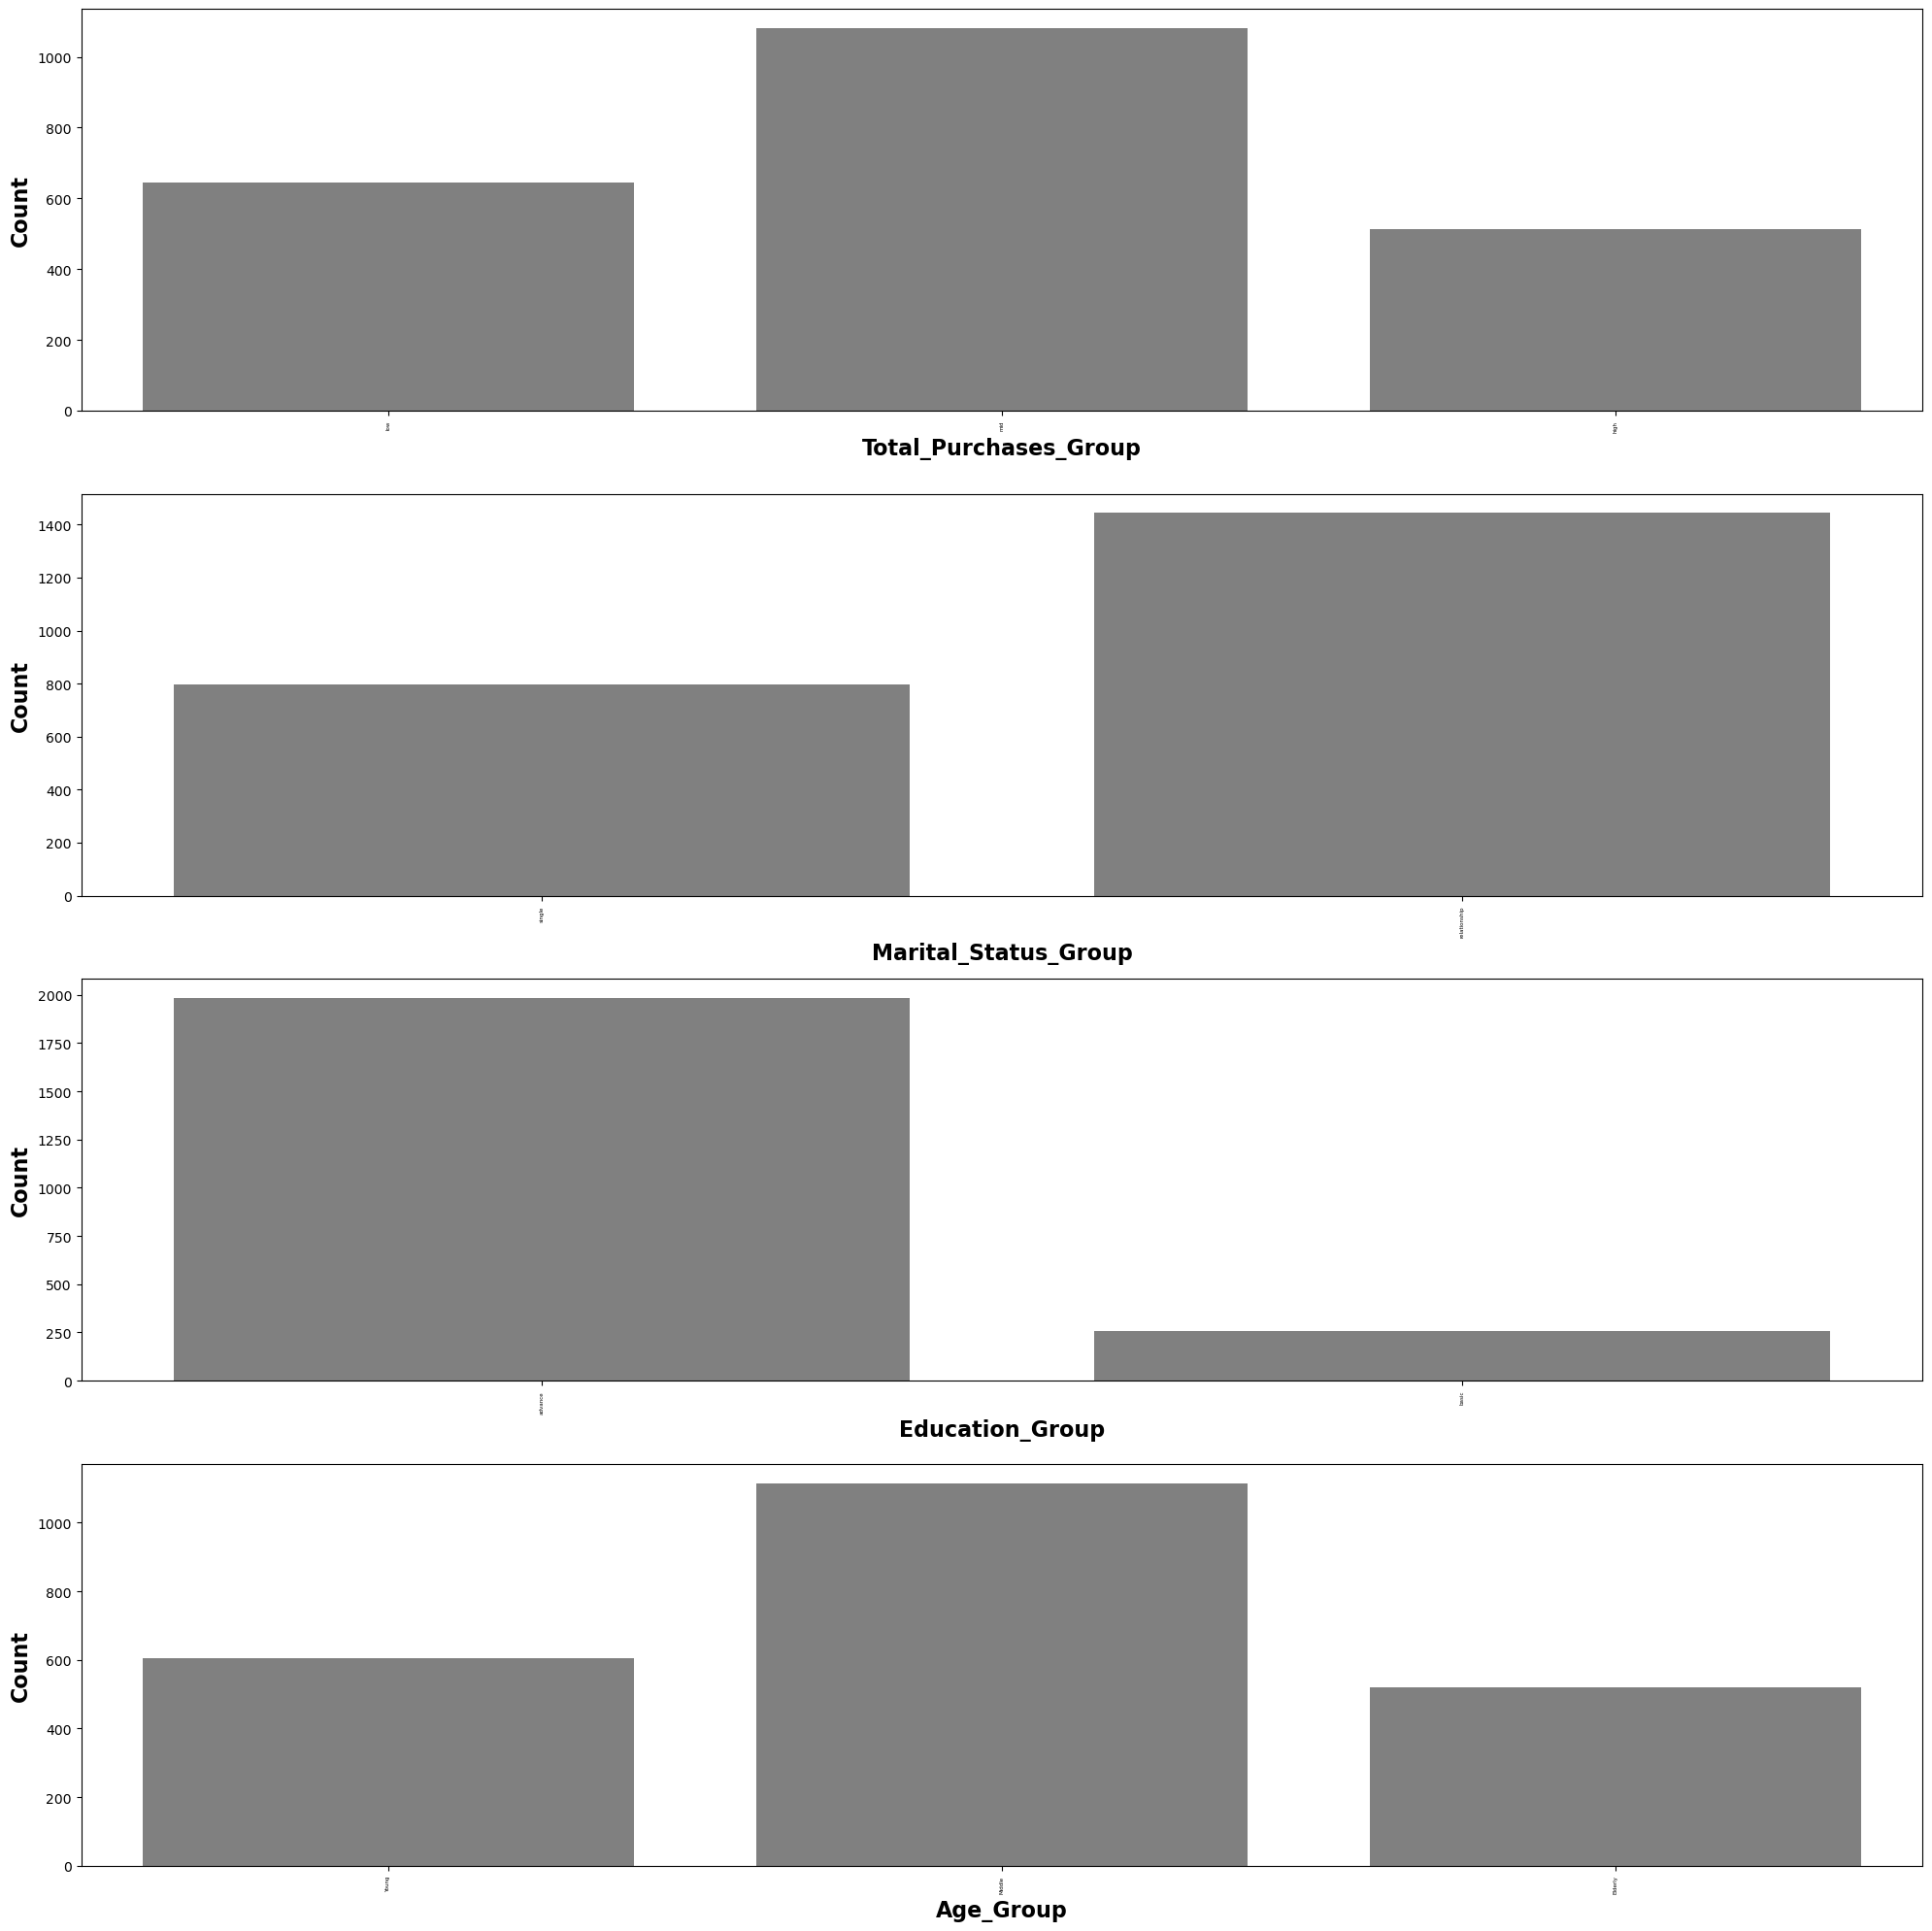

In [ ]:
plt.figure(figsize=(20,20))

for i in range(0, len(cats)):
    plt.subplot(4, 1, i+1)
    sns.countplot(x=df[cats[i]], color='gray')
    plt.xticks(rotation=90, fontsize=4)
    plt.yticks(fontsize=10)
    plt.ylabel('Count', fontsize=16, weight ='bold')
    plt.xlabel(cats[i].title(), fontsize=16, weight='bold' )
    plt.tight_layout()

plt.show()

#### delete outliers based on data distribution

In [ ]:
df2.shape

(2229, 20)

In [ ]:
nums

['ID',
 'Year_Birth',
 'Income',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'total_response',
 'conversion_rate2',
 'kids_count',
 'expenses_count',
 'total_purchases',
 'age']

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['Income'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
income_no_outliers = (df2['Income'] <= percentile_99)

df23 = df2[income_no_outliers]

In [ ]:
# menghitung berapa kali nilai 0 muncul dalam kolom
count_of_zeros = (df2['Recency'] == 0).sum()
count_of_zeros

28

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['Recency'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
recency_no_outliers = (df2['Recency'] <= percentile_99)

df23 = df2[recency_no_outliers]

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['total_purchases'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
total_purchases_no_outliers = (df2['total_purchases'] <= percentile_99)

df23 = df2[total_purchases_no_outliers]

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['conversion_rate2'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
conversion_rate2_no_outliers = (df2['conversion_rate2'] <= percentile_99)

df23 = df2[conversion_rate2_no_outliers]

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['expenses_count'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
expenses_count_no_outliers = (df2['expenses_count'] <= percentile_99)

df23 = df2[expenses_count_no_outliers]

In [ ]:
# Hitung persentil ke-99
percentile_99 = df2['age'].quantile(0.99)

# Hapus outlier berdasarkan persentil ke-99
age_no_outliers = (df2['age'] <= percentile_99)

df23 = df2[age_no_outliers]

In [ ]:
df23.shape

(2210, 20)

## Melakukan standardisasi pada data sesuai dengan dataset yang dimiliki

In [ ]:
# Pisahkan kolom numerik dan kategorikal
nums2 = df23.select_dtypes(include=['number']).columns.tolist()
cats2 = df23.select_dtypes(exclude=['number']).columns.tolist()

print("Kolom Numerik:", nums)
print("Kolom Kategorikal:", cats)

Kolom Numerik: ['ID', 'Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'total_response', 'conversion_rate2', 'kids_count', 'expenses_count', 'total_purchases', 'age']
Kolom Kategorikal: ['total_purchases_group', 'marital_status_group', 'education_group', 'age_group']


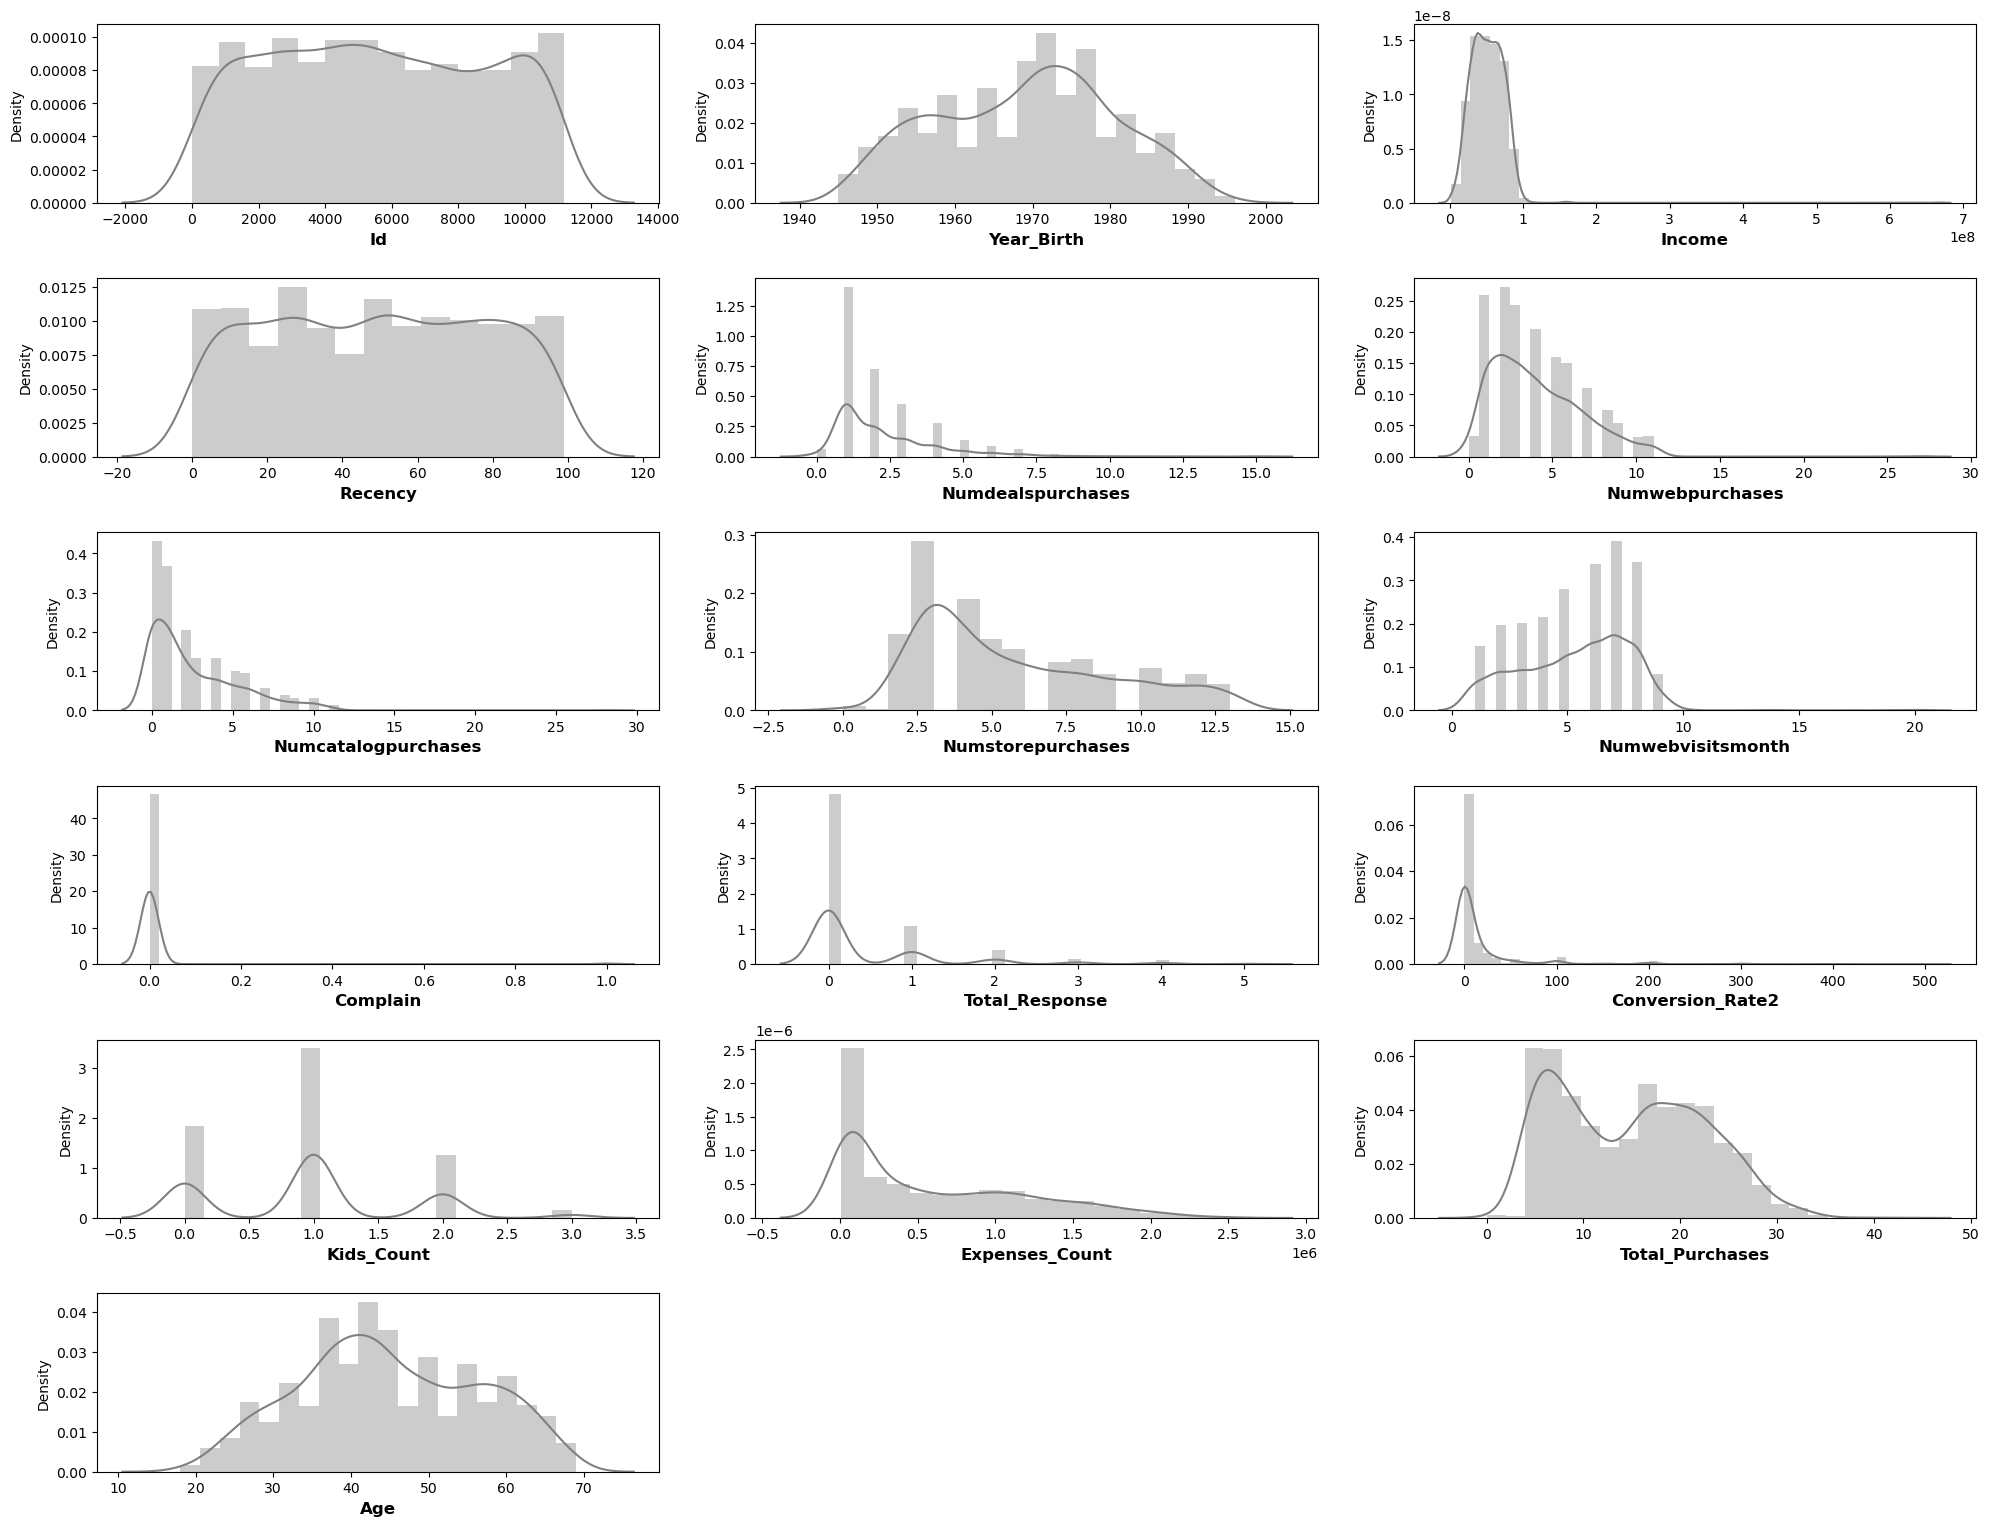

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(len(nums2)):
    plt.subplot(8, 3, i+1)
    sns.distplot(df23[nums2[i]], color='gray', kde=True)
    plt.xlabel(nums2[i].title(), fontsize=12, weight='bold')
    plt.tight_layout()

plt.show()

### Melakukan log transformation pada data yang skew ke kanan atau right-skewed
kecuali NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' karena data tersebut diwakili kolom total purchases

#### income

<Axes: xlabel='Income', ylabel='Density'>

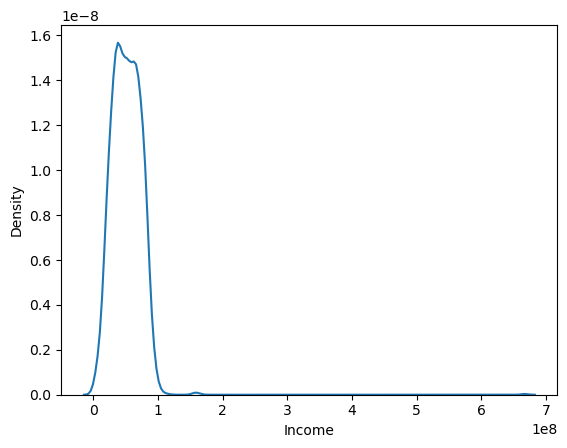

In [ ]:
sns.kdeplot(df23['Income'])

In [ ]:
df23['log_income'] = np.log(df23['Income'])

<Axes: xlabel='Income', ylabel='Density'>

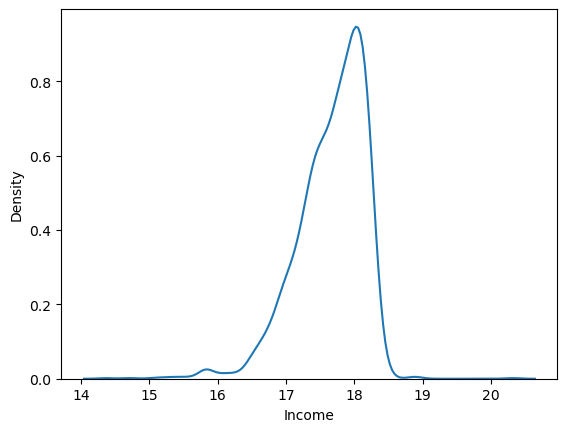

In [ ]:
sns.kdeplot(np.log(df23['Income']))

#### conversion rate

<Axes: xlabel='conversion_rate2', ylabel='Density'>

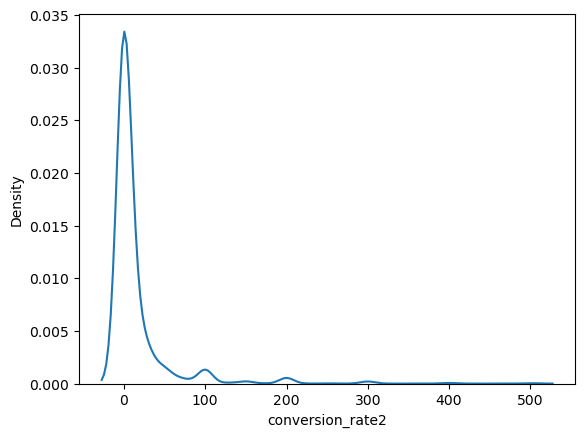

In [ ]:
sns.kdeplot(df23['conversion_rate2'])

In [ ]:
df23['log_conversion_rate2'] = np.log(df23['conversion_rate2'])

<Axes: xlabel='log_conversion_rate2', ylabel='Density'>

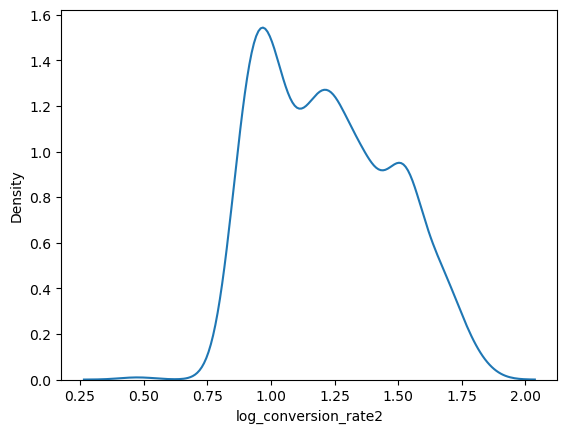

In [ ]:
sns.kdeplot(np.log(df23['log_conversion_rate2']))

In [ ]:
df23['log_conversion_rate2'].describe()

count   2210.0000000
mean            -inf
std              NaN
min             -inf
25%              NaN
50%              NaN
75%        2.4849066
max        6.2146081
Name: log_conversion_rate2, dtype: float64

#### expenses count

<Axes: xlabel='expenses_count', ylabel='Density'>

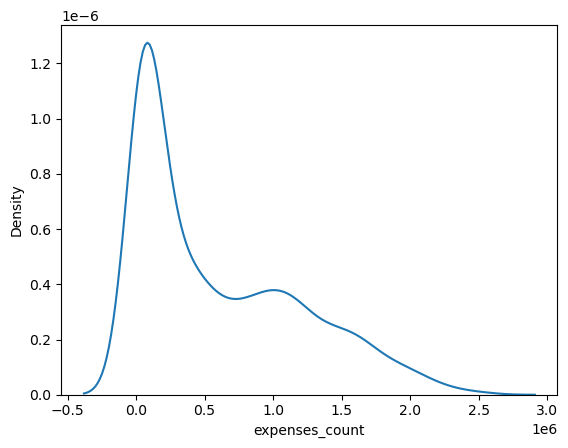

In [ ]:
sns.kdeplot(df23['expenses_count'])

In [ ]:
df23['log_expenses_count'] = np.log(df23['expenses_count'])

<Axes: xlabel='log_expenses_count', ylabel='Density'>

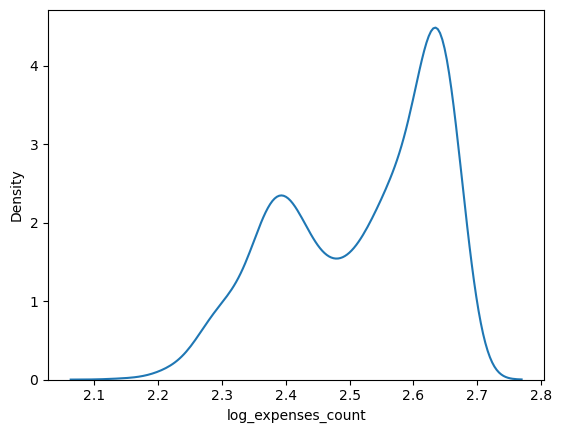

In [ ]:
sns.kdeplot(np.log(df23['log_expenses_count']))

In [ ]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2210 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     2210 non-null   int64   
 1   Year_Birth             2210 non-null   int64   
 2   Income                 2210 non-null   float64 
 3   Recency                2210 non-null   int64   
 4   NumDealsPurchases      2210 non-null   int64   
 5   NumWebPurchases        2210 non-null   int64   
 6   NumCatalogPurchases    2210 non-null   int64   
 7   NumStorePurchases      2210 non-null   int64   
 8   NumWebVisitsMonth      2210 non-null   int64   
 9   Complain               2210 non-null   int64   
 10  total_response         2210 non-null   int64   
 11  conversion_rate2       2210 non-null   int32   
 12  kids_count             2210 non-null   int64   
 13  expenses_count         2210 non-null   int64   
 14  total_purchases        2210 non-null   i

In [ ]:
kolom_yang_tidak_diperlukan2 = ['Year_Birth','Income','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','expenses_count']
df24 = df23.drop(kolom_yang_tidak_diperlukan2, axis=1)

In [ ]:
df24.shape

(2210, 15)

In [ ]:
# Pisahkan kolom numerik dan kategorikal
nums3 = df24.select_dtypes(include=['number']).columns.tolist()
cats3 = df24.select_dtypes(exclude=['number']).columns.tolist()

print("Kolom Numerik:", nums)
print("Kolom Kategorikal:", cats)

Kolom Numerik: ['ID', 'Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'total_response', 'conversion_rate2', 'kids_count', 'expenses_count', 'total_purchases', 'age']
Kolom Kategorikal: ['total_purchases_group', 'marital_status_group', 'education_group', 'age_group']


### Melakukan feature encoding

In [ ]:
df24[['total_purchases_group', 'marital_status_group', 'education_group', 'age_group']].describe()

,total_purchases_group,marital_status_group,education_group,age_group
count,2210,2210,2210,2210
unique,3,2,2,3
top,mid,relationship,advance,Middle
freq,1066,1429,1957,1110


In [ ]:
# total_purchases_group
mapping_tpg = {'low':0,'mid':1,'high':2}
df24['total_purchases_group'] = df24['total_purchases_group'].map(mapping_tpg)

# marital_status_group
mapping_msg = {'single':0,'relationship':1}
df24['marital_status_group'] = df24['marital_status_group'].map(mapping_msg)

# education_group
mapping_eg = {'basic':0,'advance':1}
df24['education_group'] = df24['education_group'].map(mapping_eg)

# age_group
mapping_ag = {'Young':0,'Middle':1,'Elderly':2}
df24['age_group'] = df24['age_group'].map(mapping_ag)

### Melakukan normalisasi
Normalisasi berguna untuk mengatur skala agar variabel-variabel yang digunakan lebih komparabel, namun tidak mempengaruhi metode yang menggunakan skala seperti K-Means Clustering.

In [ ]:
nums3

['ID',
 'Recency',
 'Complain',
 'total_response',
 'conversion_rate2',
 'kids_count',
 'total_purchases',
 'age',
 'log_income',
 'log_conversion_rate2',
 'log_expenses_count']

In [ ]:
df24.isnull().sum()

ID                       0
Recency                  0
Complain                 0
total_response           0
conversion_rate2         0
kids_count               0
total_purchases          0
total_purchases_group    0
marital_status_group     0
education_group          0
age                      0
age_group                0
log_income               0
log_conversion_rate2     0
log_expenses_count       0
dtype: int64

In [ ]:
df24.duplicated().sum()

0

In [ ]:
df24.shape

(2210, 15)

In [ ]:
df24.describe()

,ID,Recency,Complain,total_response,conversion_rate2,kids_count,total_purchases,marital_status_group,education_group,age,log_income,log_conversion_rate2,log_expenses_count
count,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000
mean,5584.1289593,49.0208145,0.0085973,0.4457014,14.7226244,0.9610860,14.8131222,0.6466063,0.8855204,44.8963801,17.6575840,-inf,12.5071436
std,3248.4960230,28.9364287,0.0923430,0.8920920,42.6043361,0.7494236,7.6312662,0.4781318,0.3184650,11.5345304,0.5004325,NaN,1.4800011
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,18.0000000,14.3636320,-inf,8.5171932
25%,2814.2500000,24.0000000,0.0000000,0.0000000,0.0000000,0.0000000,8.0000000,0.0000000,1.0000000,37.0000000,17.3784011,NaN,11.1272630
50%,5435.5000000,49.0000000,0.0000000,0.0000000,0.0000000,1.0000000,15.0000000,1.0000000,1.0000000,44.0000000,17.7560333,NaN,12.8713313
75%,8419.5000000,74.0000000,0.0000000,1.0000000,12.0000000,1.0000000,21.0000000,1.0000000,1.0000000,54.0000000,18.0357049,2.4849066,13.8489453
max,11191.0000000,99.0000000,1.0000000,5.0000000,500.0000000,3.0000000,43.0000000,1.0000000,1.0000000,69.0000000,20.3177997,6.2146081,14.7417516


In [ ]:
# Menghapus kolom log_conversion_rate2
df25 = df24.drop('log_conversion_rate2', axis=1)

##### standardisasi

In [ ]:
df_preprocessing = df25.copy()

In [ ]:
df252 = df25.copy()
df252.head()

,ID,Recency,Complain,total_response,conversion_rate2,kids_count,total_purchases,total_purchases_group,marital_status_group,education_group,age,age_group,log_income,log_expenses_count
0,5524,58,0,1,14,0,25,2,0,1,57,2,17.8783301,14.2960831
1,2174,38,0,0,0,2,6,0,0,1,60,2,17.6516024,10.2035921
2,4141,26,0,0,0,0,21,1,1,1,49,1,18.0867872,13.5619078
3,6182,26,0,0,0,1,8,0,1,1,30,0,17.0981496,10.8780472
4,5324,94,0,0,0,1,19,1,1,1,33,0,17.8809926,12.9527606


In [ ]:
feats = ['total_response','conversion_rate2','kids_count','total_purchases_group','marital_status_group','education_group','age_group']
X = df252[feats].values
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data=X_std, columns=feats)

In [ ]:
new_df.describe()

,total_response,conversion_rate2,kids_count,total_purchases_group,marital_status_group,education_group,age_group
count,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000
mean,-0.0000000,0.0000000,-0.0000000,-0.0000000,-0.0000000,0.0000000,0.0000000
std,1.0002263,1.0002263,1.0002263,1.0002263,1.0002263,1.0002263,1.0002263
min,-0.4997268,-0.3456445,-1.2827238,-1.3058106,-1.3526661,-2.7812188,-1.3525684
25%,-0.4997268,-0.3456445,-1.2827238,-1.3058106,-1.3526661,0.3595546,-1.3525684
50%,-0.4997268,-0.3456445,0.0519370,0.0896640,0.7392808,0.3595546,0.0681427
75%,0.6214876,-0.0639193,0.0519370,0.0896640,0.7392808,0.3595546,0.0681427
max,5.1063451,11.3929062,2.7212586,1.4851385,0.7392808,0.3595546,1.4888538


In [ ]:
new_df.head()

,total_response,conversion_rate2,kids_count,total_purchases_group,marital_status_group,education_group,age_group
0,0.6214876,-0.0169651,-1.2827238,1.4851385,-1.3526661,0.3595546,1.4888538
1,-0.4997268,-0.3456445,1.3865978,-1.3058106,-1.3526661,0.3595546,1.4888538
2,-0.4997268,-0.3456445,-1.2827238,0.0896640,0.7392808,0.3595546,0.0681427
3,-0.4997268,-0.3456445,0.0519370,-1.3058106,0.7392808,0.3595546,-1.3525684
4,-0.4997268,-0.3456445,0.0519370,0.0896640,0.7392808,0.3595546,-1.3525684


##### normalisasi 2

In [ ]:
df253 = df25.copy()
df253.head()

,ID,Recency,Complain,total_response,conversion_rate2,kids_count,total_purchases,total_purchases_group,marital_status_group,education_group,age,age_group,log_income,log_expenses_count
0,5524,58,0,1,14,0,25,2,0,1,57,2,17.8783301,14.2960831
1,2174,38,0,0,0,2,6,0,0,1,60,2,17.6516024,10.2035921
2,4141,26,0,0,0,0,21,1,1,1,49,1,18.0867872,13.5619078
3,6182,26,0,0,0,1,8,0,1,1,30,0,17.0981496,10.8780472
4,5324,94,0,0,0,1,19,1,1,1,33,0,17.8809926,12.9527606


In [ ]:
feats2 = ['total_response','conversion_rate2','kids_count','total_purchases_group','marital_status_group','education_group','age_group']
X = df253[feats2].values
X_nrm =  MinMaxScaler().fit_transform(X)
new_df2 = pd.DataFrame(data=X_nrm, columns=feats2)

In [ ]:
new_df2.describe()

,total_response,conversion_rate2,kids_count,total_purchases_group,marital_status_group,education_group,age_group
count,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000,2210.0000000
mean,0.0891403,0.0294452,0.3203620,0.4678733,0.6466063,0.8855204,0.4760181
std,0.1784184,0.0852087,0.2498079,0.3583821,0.4781318,0.3184650,0.3520161
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
50%,0.0000000,0.0000000,0.3333333,0.5000000,1.0000000,1.0000000,0.5000000
75%,0.2000000,0.0240000,0.3333333,0.5000000,1.0000000,1.0000000,0.5000000
max,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000


# Data Modelling

## Melihat jumlah cluster yang tepat dengan menggunakan elbow method


##### elbow method using data normalisation 2

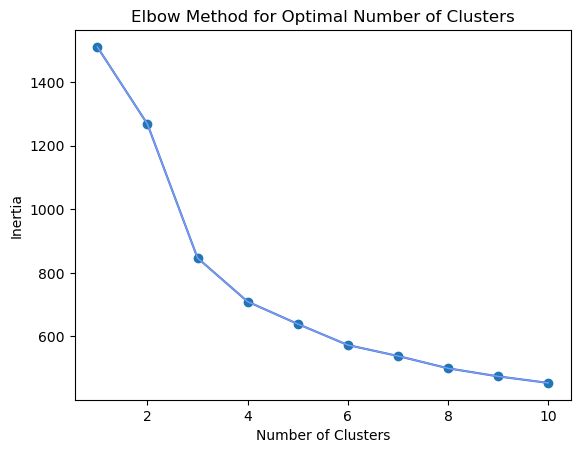

In [ ]:
# Calculate inertia for different numbers of clusters
inertia3 = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    kmeans.fit(new_df2)
    inertia3.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia3, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')

sns.lineplot(x=range(1, 11), y=inertia3, color='#8895ff', linewidth = 1)
sns.scatterplot(x=range(1, 11), y=inertia3, s=10, color='#081d8d')

plt.show()

In [ ]:
inertia3

[1510.6923903607842,
 1267.9956651622233,
 846.8021569426576,
 709.3315274629296,
 639.1842288015328,
 572.8409685377735,
 538.3638132896815,
 499.64505376368413,
 474.26539100338374,
 453.66709744145385]

In [ ]:
(pd.Series(inertia3) - pd.Series(inertia3).shift(-1))

0   242.6967252
1   421.1935082
2   137.4706295
3    70.1472987
4    66.3432603
5    34.4771552
6    38.7187595
7    25.3796628
8    20.5982936
9           NaN
dtype: float64

**Kesimpulan:** berdasarkan Elbow Method dan Inertia value, diputuskan n_cluster=4

## Melakukan implementasi clustering dengan menggunakan k-means clustering


##### k-means using data normalisation 2

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df2.values)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
new_df2['cluster'] = kmeans.labels_
new_df2.head()

,total_response,conversion_rate2,kids_count,total_purchases_group,marital_status_group,education_group,age_group,cluster
0,0.2000000,0.0280000,0.0000000,1.0000000,0.0000000,1.0000000,1.0000000,2
1,0.0000000,0.0000000,0.6666667,0.0000000,0.0000000,1.0000000,1.0000000,2
2,0.0000000,0.0000000,0.0000000,0.5000000,1.0000000,1.0000000,0.5000000,3
3,0.0000000,0.0000000,0.3333333,0.0000000,1.0000000,1.0000000,0.0000000,1
4,0.0000000,0.0000000,0.3333333,0.5000000,1.0000000,1.0000000,0.0000000,1


In [ ]:
cluster_stats = display(new_df2.groupby('cluster').agg(['mean','median']))

total_response           conversion_rate2           kids_count  \
                  mean    median             mean    median       mean   
cluster                                                                  
0            0.0632411 0.0000000        0.0157233 0.0000000  0.2859025   
1            0.0491597 0.0000000        0.0137773 0.0000000  0.3627451   
2            0.1071633 0.0000000        0.0389312 0.0000000  0.3089780   
3            0.1057471 0.0000000        0.0349476 0.0000000  0.3158791   

                  total_purchases_group           marital_status_group  \
           median                  mean    median                 mean   
cluster                                                                  
0       0.3333333             0.3517787 0.5000000            0.6719368   
1       0.3333333             0.1439076 0.0000000            1.0000000   
2       0.3333333             0.4813754 0.5000000            0.0000000   
3       0.3333333             0.6902937 0.5000000            1.0000000   

                  education_group           age_group            
           median            mean    median      mean    median  
cluster                                                          
0       1.0000000       0.0000000 0.0000000 0.3399209 0.5000000  
1       1.0000000       1.0000000 1.0000000 0.2846639 0.0000000  
2       0.0000000       1.0000000 1.0000000 0.4964183 0.5000000  
3       1.0000000       1.0000000 1.0000000 0.6181354 0.5000000

## Menghitung sillhouette score melihat bagaimana performa model yang didapat

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

##### score on data normalisation 2

In [ ]:
score3 = silhouette_score(new_df2, kmeans.labels_)
print("Silhouette Score: ", score3)

Silhouette Score:  0.5572685382691343


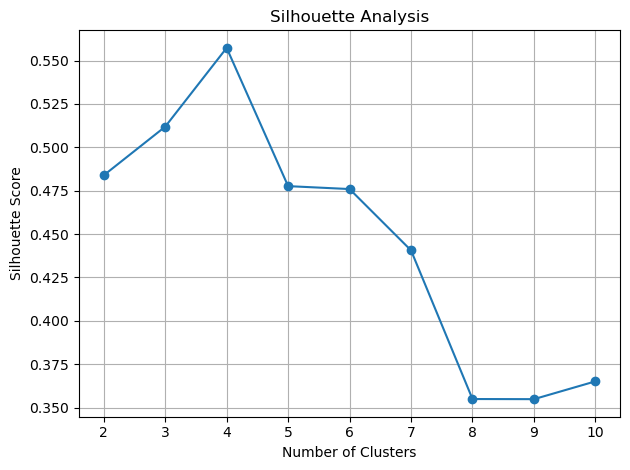

In [ ]:
# Range jumlah klaster yang ingin diuji
n_clusters_range = range(2, 11)

# List untuk menyimpan nilai rata-rata Silhouette Score
silhouette_scores = []

for n_clusters in n_clusters_range:
    # Inisialisasi dan melatih model KMeans dengan jumlah klaster tertentu
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(new_df2)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(new_df2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score untuk berbagai jumlah klaster
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid()

plt.tight_layout()

**kesimpulan:** grafik nilai rata-rata silhoutte score pada seluruh cluster menunjukkan bahwa silhoutte score tertinggi diperoleh pada cluster 4.

# Customer Personality Analysis Based on Marketing Retargeting

# Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan

##### PCA using data normalizasion 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(new_df2)
pdf2 = pca.transform(new_df2)

In [ ]:
pca_viz2 = pd.DataFrame(data = pdf2, columns = ['PC 1', 'PC 2'])
pca_viz2['cluster'] = new_df2['cluster']
pca_viz2

,PC 1,PC 2,cluster
0,-0.2420528,0.7215468,2
1,-0.0607730,0.6284088,2
2,-1.0861048,-0.3174061,3
3,0.9701937,-0.4124287,1
4,0.8829023,-0.3805705,1
...,...,...,...
2205,-1.0849397,-0.3282888,3
2206,-1.2366077,-0.2893102,3
2207,-0.0301156,0.6472953,2
2208,-1.2345709,-0.2752010,3


In [ ]:
pca_viz2['cluster'].nunique()

4

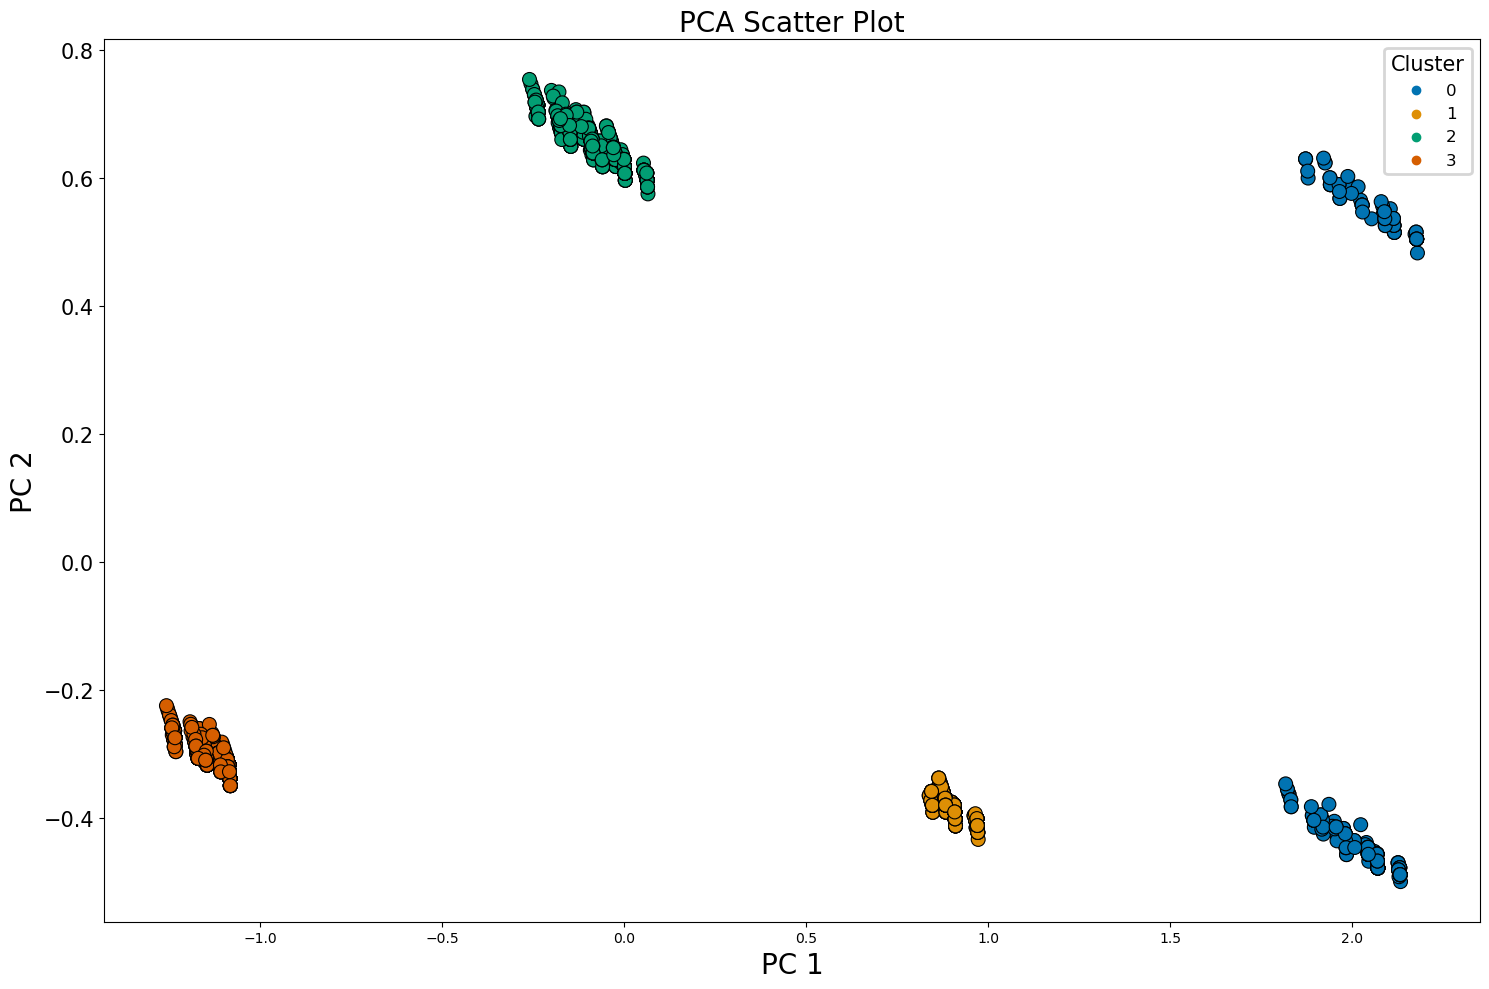

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    data=pca_viz2,
    palette='colorblind',
    s=100,
    ax=ax,
)

plt.title('PCA Scatter Plot', fontsize=20)


legend = plt.legend(title='Cluster', fontsize=12, borderaxespad=0.5)
legend.get_title().set_fontsize(15)  # Set legend title fontsize
legend.get_frame().set_linewidth(2)  # Set legend boundary linewidth


plt.yticks(fontsize=15)
plt.ylabel('PC 2',fontsize=20)
plt.xlabel('PC 1',fontsize=20)

plt.tight_layout()
plt.savefig('PCA scatterplot', dpi=200)

In [ ]:
#df_ori = df.copy()
df_cvr = df1.copy()
df_pre = df23.copy()

In [ ]:
df_cvr.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate,total_response,conversion_rate2,kids_count,expenses_count,total_purchases,total_purchases_group,marital_status_group,education_group,age,age_group
2146,2146,1818,1971,S3,Bertunangan,29732000.0000000,1,0,25-03-2014,23,25000,0,8000,0,1000,4000,1,2,0,2,9,0,0,0,0,0,0,3,11,0,0,0,0,1,38000,5,low,relationship,advance,43,Middle
1198,1198,5545,1972,S3,Menikah,78075000.0000000,0,0,05-04-2014,72,572000,8000,259000,34000,35000,80000,1,3,5,5,1,0,0,0,0,0,0,3,11,0,0,0,0,0,988000,14,mid,relationship,advance,42,Middle
1131,1131,606,1967,S1,Lajang,25930000.0000000,1,1,10-10-2013,87,6000,1000,2000,2000,0,4000,1,1,0,2,7,0,0,0,0,0,0,3,11,0,0,0,0,2,15000,4,low,single,advance,47,Middle


In [ ]:
#df_ori.info()

In [ ]:
df_pre['cluster'] = kmeans.labels_

In [ ]:
df_pre

,ID,Year_Birth,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,total_response,conversion_rate2,kids_count,expenses_count,total_purchases,total_purchases_group,marital_status_group,education_group,age,age_group,log_income,log_conversion_rate2,log_expenses_count,cluster
0,5524,1957,58138000.0000000,58,3,8,10,4,7,0,1,14,0,1617000,25,high,single,advance,57,Elderly,17.8783301,2.6390573,14.2960831,5
1,2174,1954,46344000.0000000,38,2,1,1,2,5,0,0,0,2,27000,6,low,single,advance,60,Elderly,17.6516024,-inf,10.2035921,1
2,4141,1965,71613000.0000000,26,1,8,2,10,4,0,0,0,0,776000,21,mid,relationship,advance,49,Middle,18.0867872,-inf,13.5619078,2
3,6182,1984,26646000.0000000,26,2,2,0,4,6,0,0,0,1,53000,8,low,relationship,advance,30,Young,17.0981496,-inf,10.8780472,3
4,5324,1981,58293000.0000000,94,5,5,3,6,5,0,0,0,1,422000,19,mid,relationship,advance,33,Young,17.8809926,-inf,12.9527606,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223000.0000000,46,2,9,3,4,5,0,0,0,1,1341000,18,mid,relationship,advance,47,Middle,17.9300335,-inf,14.1089262,2
2236,4001,1946,64014000.0000000,56,7,8,2,5,7,0,1,14,3,444000,22,high,relationship,advance,68,Elderly,17.9746124,2.6390573,13.0035798,7
2237,7270,1981,56981000.0000000,91,1,2,3,13,6,0,1,16,0,1241000,19,mid,single,advance,33,Young,17.8582284,2.7725887,14.0314281,6
2238,8235,1956,69245000.0000000,8,2,6,5,10,3,0,0,0,1,843000,23,high,relationship,advance,58,Elderly,18.0531615,-inf,13.6447222,7


In [ ]:
#df_merged = df_ori.merge(df_cvr[['ID','conversion_rate2']], on='ID', how='right')
df_merged = df_cvr.merge(df_pre[['ID', 'cluster']], on='ID', how='right')

# Memeriksa kolom-kolom yang ada dalam df_merged
print(df_merged.columns)

# Pastikan kolom-kolom yang Anda pilih ada dalam df_merged
selected_columns = ['total_response','conversion_rate2','kids_count','total_purchases_group','marital_status_group','education_group','age_group','cluster']

# Memeriksa apakah semua kolom yang Anda pilih ada dalam df_merged
missing_columns = [col for col in selected_columns if col not in df_merged.columns]

if missing_columns:
    print("Kolom-kolom berikut tidak ada dalam df_merged:", missing_columns)
else:
    df_merged = df_merged[selected_columns]

# Sekarang Anda dapat melanjutkan dengan operasi berikutnya pada df_merged


Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'conversion_rate', 'total_response', 'conversion_rate2', 'kids_count',
       'expenses_count', 'total_purchases', 'total_purchases_group',
       'marital_status_group', 'education_group', 'age', 'age_group',
       'cluster'],
      dtype='object')


In [ ]:
df_merged.head()

,total_response,conversion_rate2,kids_count,total_purchases_group,marital_status_group,education_group,age_group,cluster
0,1,14,0,high,single,advance,Elderly,5
1,0,0,2,low,single,advance,Elderly,1
2,0,0,0,mid,relationship,advance,Middle,2
3,0,0,1,low,relationship,advance,Young,3
4,0,0,1,mid,relationship,advance,Young,3


In [ ]:
cols = df_merged.columns.tolist()

In [ ]:
display(df_merged[cols].groupby('cluster').agg(['mean','median','min','max']))

total_response                   conversion_rate2                     \
                  mean    median min max             mean    median min  max   
cluster                                                                        
0            0.3734940 0.0000000   0   4        7.8313253 0.0000000   0  100   
1            0.1385542 0.0000000   0   2        2.2469880 0.0000000   0   40   
2            0.5391791 0.0000000   0   5       16.8955224 0.0000000   0  500   
3            0.3437500 0.0000000   0   4       11.1601562 0.0000000   0  300   
4            0.2882353 0.0000000   0   4        7.8764706 0.0000000   0  200   
5            0.6240602 0.0000000   0   5       20.8571429 0.0000000   0  500   
6            0.9629630 0.0000000   0   5       47.4000000 0.0000000   0  400   
7            0.5060729 0.0000000   0   5       18.7287449 0.0000000   0  200   
8            0.5227273 0.0000000   0   5       15.3068182 0.0000000   0  250   
9            0.1318182 0.0000000   0   2        1.9181818 0.0000000   0   33   

        kids_count                    
              mean    median min max  
cluster                               
0        0.8915663 1.0000000   0   3  
1        1.3132530 1.0000000   0   3  
2        0.9720149 1.0000000   0   3  
3        0.8046875 1.0000000   0   3  
4        0.8411765 1.0000000   0   3  
5        0.8045113 1.0000000   0   3  
6        0.4444444 0.0000000   0   2  
7        0.8947368 1.0000000   0   3  
8        0.9924242 1.0000000   0   3  
9        1.4181818 1.0000000   0   3

# Memilih cluster yang akan dilakukan marketing retargetting


# Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada